<a href="https://colab.research.google.com/github/dbalstjr16/personalProject/blob/main/FirstAttemptMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plot

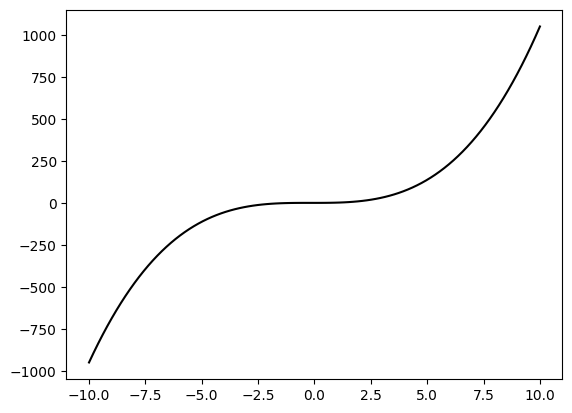

In [16]:
#create polynomial regressionline plot

#i need to define a polynomial function
def func(x):
  return x**3 + 1/2*x**2 + 1

x = np.linspace(-10, 10, 100)
y = func(x)

plot.plot(x, y, color = 'black')
plot.show()

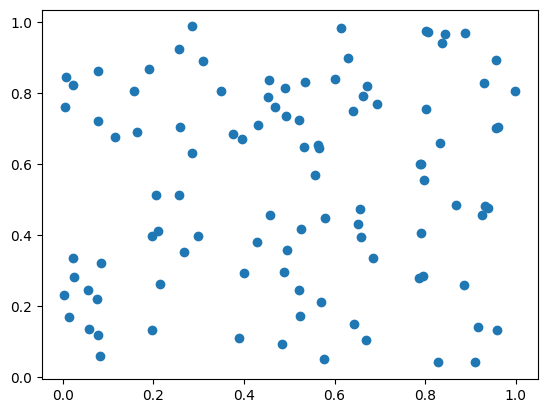

In [67]:
#Goal: I want to color points over and under the line differently
#alternative maybe color odd # quadrants of plot
x = np.random.rand(100)
y = np.random.rand(100)

plot.scatter(x, y)

In [35]:
#create perceptron class
class Perceptron:

  def __init__(self, numberOfInput, learningRate):
    self.bias = 1
    self.learningRate = learningRate

    #create array (named weights) ranging from -1 to 1, with length of numberofInput.
    self.weights = [random.uniform(-1, 1) for _ in range(numberOfInput + 1)] # +1 to account bias? interesting...

  #we need function with activating/predicting values
  def activate(self, inputs):
    sum = 0

    # Make sure the input length matches the weight length
    if len(inputs) != len(self.weights):
        raise ValueError("Input length does not match weight length")

    for i in range(len(inputs)):
      sum += inputs[i] * self.weights[i]

    return 1 if sum > 0 else 0

  def train(self, inputs, desired):

    inputs.append(self.bias) #we gotta add bias to inputs
    guess = self.activate(inputs) #calculate guess with bias
    error = desired - guess

    if error != 0:
      for i in range(len(inputs)):
        self.weights[i] += self.learningRate * error * inputs[i]

In [65]:
# Initialize a perceptron with 3 inputs (including bias) and a learning rate of 0.01
p = Perceptron(3, 0.01)

# Train the perceptron with some example inputs and desired outputs
training_data = [
    ([0, 0, 1], 0),  # Add bias input
    ([0, 1, 1], 0),
    ([1, 0, 1], 0),
    ([1, 1, 1], 1)
]

for i in range(100):  # Train for 100 epochs

    training_data = [
    ([0, 0, 1], 0),  # Add bias input
    ([0, 1, 1], 0),
    ([1, 0, 1], 0),
    ([1, 1, 1], 1)
    ]

    for inputs, desired in training_data:

      p.train(inputs, desired)

# Test the perceptron with a new input
test_input = [1, 1, 1]  # Add bias input

for _ in range (5):
  print("Test input:", test_input, "Prediction:", p.activate(test_input + [1]))


Test input: [1, 1, 1] Prediction: 1
Test input: [1, 1, 1] Prediction: 1
Test input: [1, 1, 1] Prediction: 1
Test input: [1, 1, 1] Prediction: 1
Test input: [1, 1, 1] Prediction: 1


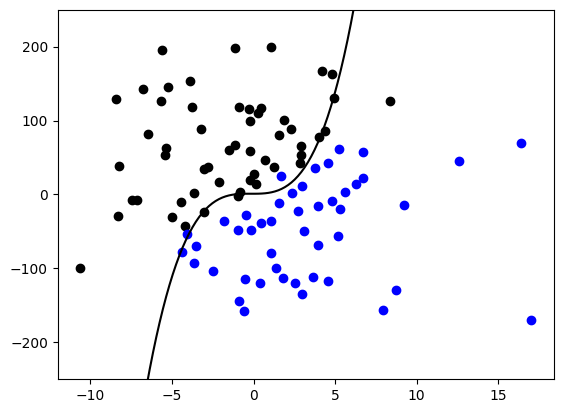

In [101]:
#machine learning/create result
learningRate = 0.0001
numberOfPoints = 100

plot.plot(x, y, color = 'black')

xRandomPoints = 5 * np.random.randn(numberOfPoints)
yRandomPoints = numberOfPoints * np.random.randn(numberOfPoints)

desired = np.where(yRandomPoints > func(xRandomPoints), 1, 0)

p = Perceptron(2, learningRate)

for _ in range(10000):
  for i in range(numberOfPoints):
    p.train([xRandomPoints[i], yRandomPoints[i]], desired[i])

#color each points/display result
for i in range(numberOfPoints):
  xPoint = xRandomPoints[i]
  yPoint = yRandomPoints[i]
  guess = p.activate([xPoint, yPoint, p.bias])
  color = 'blue' if guess == 0 else 'black'
  plot.scatter(xPoint,yPoint, color=color)

plot.ylim(-250, 250)

plot.show()